In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv("D:\ML_Program\Data\weight-height.csv")

In [10]:
df.head(4)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470


In [11]:
df=df.drop(['Gender'],axis=1)

In [12]:
df.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


### KNN Regressor & Linear Regression

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
x=df[['Height']]
y=df[['Weight']]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [16]:
x_train.shape

(5988, 1)

In [17]:
y_train.shape

(5988, 1)

In [18]:
x_test.shape

(2567, 1)

In [19]:
y_test.shape

(2567, 1)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg=LinearRegression()

In [22]:
# for fitting the model
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
reg.predict([[68.781904]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[180.87717319]])

In [24]:
df['Predicted Weight']=reg.predict(df[['Height']])

In [25]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,219.765794
1,68.781904,162.310473,180.877174
2,74.110105,212.740856,221.785719
3,71.730978,220.042470,203.519400
4,69.881796,206.349801,189.321857
...,...,...,...
8550,60.483946,110.565497,117.167606
8551,63.423372,129.921671,139.735754
8552,65.584057,155.942671,156.324933
8553,67.429971,151.678405,170.497386


### Accuracy 

In [26]:
regression_score = reg.score(x_test,y_test)
print(regression_score*100,'%')

85.39010145178258 %


### MSE check

In [27]:
 from sklearn.metrics import mean_squared_error

In [28]:
y_true=df['Weight']
y_pred=df['Predicted Weight']

In [29]:
mse=mean_squared_error(y_true,y_pred,squared=False)

In [30]:
mse

12.332115934583838

# KNN Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
KNN1=KNeighborsRegressor()

In [33]:
KNN1.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
y_pred=KNN1.predict(x_test)

In [35]:
y_pred

array([[193.9899587 ],
       [136.29194858],
       [179.10741578],
       ...,
       [109.19430234],
       [204.31721764],
       [113.95283777]])

In [36]:
regression_score = KNN1.score(x_test,y_test)
print(regression_score*100,'%')

82.26967486457018 %


### MSE(Mean Square Error) check

In [37]:
print(mean_squared_error(y_test,y_pred,squared=False))

13.451862473407095


## Hyperparameter optimization for k value

In [40]:
error=[]

# calculating error for k values beetween 1 to 40
for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

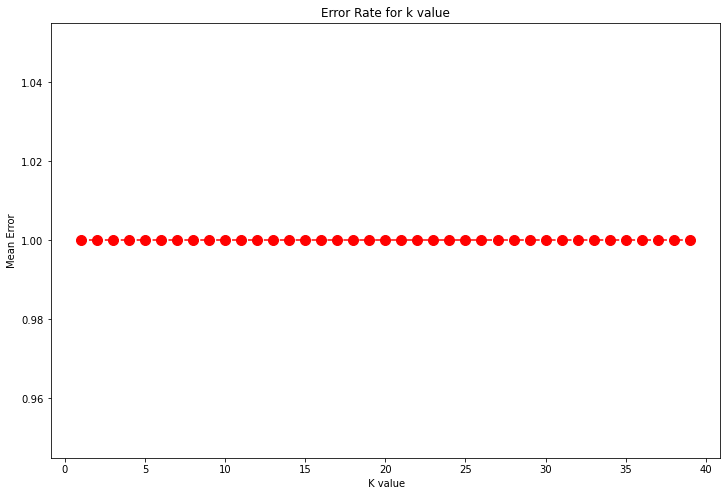

In [43]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markersize=10)
plt.title("Error Rate for k value")
plt.xlabel(" K value")
plt.ylabel("Mean Error")

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
k=np.random.randint(1,20,30)

params={'n_neighbors':k}

random_search= RandomizedSearchCV(KNN1,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
random_search.fit(x_train,y_train)


print("train score : "+str(random_search.score(x_train,y_train)))
print("test score : "+str(random_search.score(x_test,y_test)))

train score : 0.864012793543932
test score : 0.8476975192651861


In [82]:
print(random_search.best_params_)

{'n_neighbors': 17}


### After Tuning , now i am trying the neighbors number 50

In [83]:
KNN2=KNeighborsRegressor(n_neighbors=17)

In [84]:
KNN1.fit(x_train,y_train)

KNeighborsRegressor()

In [85]:
y_pred=KNN1.predict(x_test)

In [86]:
y_pred

array([[193.9899587 ],
       [136.29194858],
       [179.10741578],
       ...,
       [109.19430234],
       [204.31721764],
       [113.95283777]])

In [87]:
regression_score = KNN1.score(x_test,y_test)
print(regression_score*100,'%')

82.26967486457018 %


Nothing have changed in accuracy score

# KNN Classifier

In [90]:
df2=pd.read_csv("D:\ML_Program\Data\weight-height.csv")

In [91]:
df2.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Now I am applying label encoding technique in Gender column 

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()

In [95]:
df2['Gender']=le.fit_transform(df2['Gender'])

In [96]:
df2.head(3)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856


data.iloc[:,0] # first column of data frame (first_name)

data.iloc[:,1] # second column of data frame (last_name)

data.iloc[:,-1] # last column of data frame (id)

In [132]:
y2=df2['Gender']

In [133]:
y2.head(3)

0    1
1    1
2    1
Name: Gender, dtype: int32

In [134]:
x2=df2[['Height','Weight']]

In [135]:
x.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


In [136]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.30)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [151]:
KNN_Classifier=KNeighborsClassifier()

In [152]:
KNN_Classifier.fit(x2_train,y2_train)

KNeighborsClassifier()

In [155]:
y2_pred=KNN_Classifier.predict(x2_test)

<AxesSubplot:>

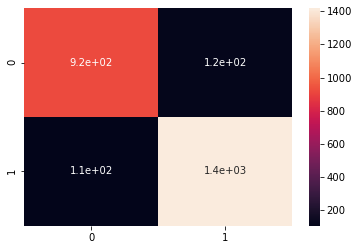

In [156]:
# Confusion Matrix
cm=confusion_matrix(y2_pred,y2_test)
sns.heatmap(cm,annot=True)

In [157]:
#accuracy and classification report 

print(accuracy_score(y2_pred,y2_test))
print(classification_report(y2_pred,y2_test))

0.9119594857810674
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1044
           1       0.92      0.93      0.93      1523

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



Now I am trying to tuning with randomized cv 

In [158]:
k=np.random.randint(1,8,10)

params={'n_neighbors':k}

random_search= RandomizedSearchCV(KNN_Classifier,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
random_search.fit(x2_train,y2_train)


print("train score : "+str(random_search.score(x2_train,y2_train)))
print("test score : "+str(random_search.score(x2_test,y2_test)))

train score : 0.9261857047428189
test score : 0.9123490455784963


In [159]:
print(random_search.best_params_)

{'n_neighbors': 6}


Here, suggesting the best neighbors value is 6, so I will trying this

In [160]:
KNN_Classifier=KNeighborsClassifier(n_neighbors=6)

In [161]:
KNN_Classifier.fit(x2_train,y2_train)

KNeighborsClassifier(n_neighbors=6)

In [162]:
y2_pred=KNN_Classifier.predict(x2_test)

<AxesSubplot:>

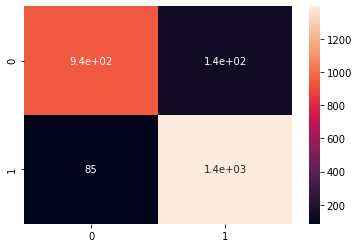

In [163]:
# Confusion Matrix
cm=confusion_matrix(y2_pred,y2_test)
sns.heatmap(cm,annot=True)

In [164]:
#accuracy and classification report 

print(accuracy_score(y2_pred,y2_test))
print(classification_report(y2_pred,y2_test))

0.9123490455784963
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1085
           1       0.91      0.94      0.93      1482

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

